In [60]:
import pandas as pd
import numpy as np

In [61]:
df_x = pd.read_csv("./Data/linearX.csv", header=None)
df_y = pd.read_csv("./Data/linearY.csv", header=None)

In [62]:
x_data_raw = np.array(df_x[0].to_list())
y_data = np.array(df_y[0].to_list())

In [63]:
# Normalise x_data_raw
x_data_original = (x_data_raw - np.mean(x_data_raw))/np.std(x_data_raw)

In [64]:
x_data = np.column_stack((x_data_original, np.ones(len(x_data_original))))

In [79]:

J_theta_old = 0
J_theta_new = 1e5
threshold = 1e-17
eta = 0.01
theta_initial = np.zeros(2)
while abs(J_theta_new-J_theta_old) > threshold:
    
    J_theta = 0
    m = len(x_data)
    for x,y in zip(x_data,y_data):
        J_theta += (y - np.sum(x * theta_initial))**2
    J_theta = J_theta/(2*m)
    
    J_theta_old = J_theta_new
    J_theta_new = J_theta   
    
    theta_initial = theta_initial - eta * (1/m) * np.dot((np.dot(x_data, theta_initial) - y_data) , x_data)
    print(f"J_theta: {J_theta}, Difference: {abs(J_theta_new-J_theta_old)}, Parameters:{theta_initial}")
    

J_theta: 0.49662790471450036, Difference: 99999.50337209529, Parameters:[1.34019602e-05 9.96620100e-03]
J_theta: 0.48674503318699885, Difference: 0.009882871527501502, Parameters:[2.66699008e-05 1.98327400e-02]
J_theta: 0.47705883080289474, Difference: 0.009686202384104114, Parameters:[3.98051619e-05 2.96006136e-02]
J_theta: 0.4675653838462344, Difference: 0.009493446956660323, Parameters:[5.28090705e-05 3.92708085e-02]
J_theta: 0.45826085648401155, Difference: 0.00930452736222287, Parameters:[6.56829400e-05 4.88443014e-02]
J_theta: 0.4491414892162969, Difference: 0.009119367267714673, Parameters:[7.84280708e-05 5.83220594e-02]
J_theta: 0.4402035973572099, Difference: 0.008937891859087, Parameters:[9.10457503e-05 6.77050398e-02]
J_theta: 0.4314435695461187, Difference: 0.008760027811091198, Parameters:[0.00010354 0.07699419]
J_theta: 0.4228578662884679, Difference: 0.00858570325765079, Parameters:[0.0001159  0.08619045]
J_theta: 0.41444301852564464, Difference: 0.008414847762823252, Pa

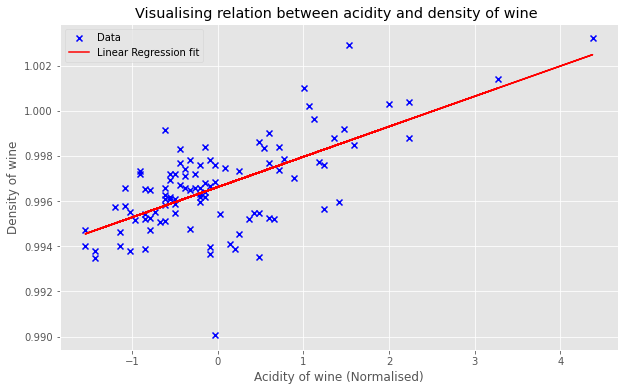

In [80]:
#Plot this data and linear regression output
import matplotlib.pyplot as plt

plt.style.use('ggplot')


plt.figure(figsize=(10, 6))
plt.scatter(x_data_original, y_data, label='Data', color='blue', marker='x')
regression = x_data_original * theta_initial[0] + theta_initial[1]
plt.plot(x_data_original, regression, label='Linear Regression fit', color='red')

plt.xlabel("Acidity of wine (Normalised)")
plt.ylabel("Density of wine")
plt.title("Visualising relation between acidity and density of wine ") 
plt.legend()
plt.savefig('LinearGraphs/linear_visualised.png', dpi=300, bbox_inches='tight')
plt.show()

